<h1>PGA Handicap Calculator Recording Program!</h1>

In [3]:
import pandas as pd
import datetime as dt
import openpyxl
import os
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

pd.set_option('expand_frame_repr', False)

In [4]:
#Functio no add info to a brand new excel sheet
#First time adding a score

def first_add():
    first_Cluster = {'Date':[],'Location':[], 'Holes':[], 'Score':[],'Course Rating':[],'Course Slope':[], 'Score Differential':[]}

    first_Cluster["Date"].append(date)
    first_Cluster["Location"].append(place_Played.upper())
    first_Cluster["Holes"].append(int(holes))
    first_Cluster["Score"].append(int(score))
    first_Cluster["Course Rating"].append(float(course_Rating))
    first_Cluster["Course Slope"].append(float(course_Slope))
    first_Cluster["Score Differential"].append(score_Differential)
    print(first_Cluster)
    
    #make it a dataframe
    df = pd.DataFrame(first_Cluster)
    
    #add it to excel sheet
    df.to_excel(path, sheet_name='Records', index=False)
    

In [5]:
#adding to existing excel sheet function

def existing_add():
    
    diff_Cluster = {'Date':[],'Location':[], 'Holes': [], 'Score':[],'Course Rating':[],'Course Slope':[], 'Score Differential':[]}
    
    diff_Cluster["Date"].append(date)
    diff_Cluster["Location"].append(place_Played.upper())
    diff_Cluster["Holes"].append(int(holes))
    diff_Cluster["Score"].append(int(score))
    diff_Cluster["Course Rating"].append(float(course_Rating))
    diff_Cluster["Course Slope"].append(float(course_Slope))
    diff_Cluster["Score Differential"].append(score_Differential)
    
    
    df = pd.DataFrame(diff_Cluster)
   
    
    book = openpyxl.load_workbook(path)
    writer = pd.ExcelWriter(path, engine='openpyxl', mode='a') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    sheet = book.worksheets[0]
    rows = sheet.max_row
    df.to_excel(writer, 'Records', startrow=rows, index=False, header=False)


    writer.save()
    writer.close()
    


    

In [6]:
#WELCOME MESSAGE/INTRO

print("Welcome to the Handicap Scoring Calculator")

print("Let me get some key information from you about your last round\n")



#GET THE USER INFORMATION
    #-Date
    #-Place
    #-Score
    #-Course Rating
    #-Slope
    #-File path

    
cwd = os.getcwd()
path = str(cwd)+'/golf_records.xlsx'

# GET THE DATE
#date = date.today()
#today = date.strftime("%m/%d/%y")
day_input = input("When did you play? (MM/DD): ")
date = day_input + "/21"

#WHERE THEY PLAYED
place_Played = input("Where did you play?(Course Name/Town): ")

#HOW MANY HOLES
holes = input("How many holes (9 or 18): ")

#WHAT THE SCORE WAS
score = input("What did you shoot?:  "  )

#WHATS THE COURE RATING
course_Rating = input("What was the course rating?: "  )

#WHATS THE COURSE SLOPE
course_Slope = input("What was the course slope?:  " )


#CALCULATE THE SCORE DIFFERENIAL FOR THE ROUND
# Inorder to get handicap index need 5+ SCORES IDEALLY 20+
score_Differential = (113/float(course_Slope))*(float(score)-float(course_Rating))


    

Welcome to the Handicap Scoring Calculator
Let me get some key information from you about your last round

When did you play? (MM/DD): 10/09
Where did you play?(Course Name/Town): Bartlett Hills
How many holes (9 or 18): 18
What did you shoot?:  102
What was the course rating?: 70.2
What was the course slope?:  126


In [7]:
#ASK THE USER IF ALL THE INFORMATION IS CORRECT BEFORE ADDING IT TO THE FILE

double_Check = "\nDate Played: " + str(date) + ",\n" + "Place Played: " + str(place_Played.upper())+ ",\nHoles Played: " + str(holes) + ",\nScore: " +str(score)+ ",\n"+"Course Rating: " +str(course_Rating)+ ",\nSlope: " +str(course_Slope)
print(double_Check)


#Check if information is correct before moving on

correct_Info = input("Is this information correct?(Yes/No): ")

while correct_Info.upper() == "NO":
    
    if correct_Info.upper() == "NO":
        print("-------")
        print("Please enter your information again.")
        
        #Date
        day_input = input("When did you play? (MM/DD): ")
        date = day_input + "/21"
        
        #WHERE THEY PLAYED
        place_Played = input("Where did you play?(Course Name/Town): ")

        #HOW MANY HOLES
        holes = input("How many holes (9 or 18): ")

        #WHAT THE SCORE WAS
        score = input("What did you shoot?:  "  )

        #WHATS THE COURE RATING
        course_Rating = input("What was the course rating?: "  )

        #WHATS THE COURSE SLOPE
        course_Slope = input("What was the course slope?:  " )


        #CALCULATE THE SCORE DIFFERENIAL FOR THE ROUND
        # Inorder to get handicap index need 5+ SCORES IDEALLY 20+
        score_Differential = (113/float(course_Slope))*(float(score)-float(course_Rating))
        print("-------")
        print(double_Check)
        correct_Info = input("Is this information correct?(Yes/No): ")
    else:
        print(double_Check)




Date Played: 10/09/21,
Place Played: BARTLETT HILLS,
Holes Played: 18,
Score: 102,
Course Rating: 70.2,
Slope: 126


In [9]:
existing_add()

first_time = input("Is this your first time adding a rounds information?(Yes/No): ")

if first_time.upper() == 'YES':
    first_add()
else:
    existing_add()


<h1>Summary Section</h1>

In [10]:
#Compute all info needed from golf_records.xlsx

def golf_data(filename):
    cwd = os.getcwd()
    path = str(cwd)+ filename
    data = pd.read_excel(path)
    data.Date = pd.to_datetime(data.Date,dayfirst=True)
    final_list = []
    
    #Total number of records 
    records = data['Score Differential'].count()
    
    #all the 18 hole rounds
    full_Round = data.loc[data['Holes'] == 18]
    full_Round_sorted = full_Round['Score Differential'].sort_values().tolist()
    for i in full_Round_sorted:
        final_list.append(i)
    
    
    
    #all the 9 hole rounds
    half_Round = data.loc[data['Holes'] == 9]
    half_Round_sorted = half_Round['Score Differential'].sort_values().tolist()

    
    # add combined 9 holes to 18 holes list
    how_many_rows = int(len(half_Round_sorted)//2)
    newhalf = half_Round_sorted[0:how_many_rows*2]
    halfarray = np.array(newhalf)
    upx2 = halfarray.reshape(how_many_rows,2).sum(axis=1).tolist()
    final = [] 
    for i in upx2:
        final_list.append(i)

    # sorting fully combined list
    full_count = len(final_list)
    final_list.sort()
    
    
    #Get the averages of the rounds
    if full_count <= 4:
        top = "Not enough rounds recorded."
    elif full_count == 5 or full_count == 6:
        top = st.mean(final_list[0:1])
    elif full_count == 7 or full_count == 8:
        top = st.mean(final_list[0:2])
    elif full_count == 9 or full_count == 10:
        top = st.mean(final_list[0:3])
    elif full_count == 11 or full_count == 12:
        top = st.mean(final_list[0:4])
    elif full_count == 13 or full_count == 14:
        top = st.mean(final_list[0:5])
    elif full_count == 15 or full_count == 16:
        top = st.mean(final_list[0:6])
    elif full_count == 17:
        top = st.mean(final_list[0:7])
    elif full_count == 18:
        top = st.mean(final_list[0:8])
    elif full_count == 19:
        top = st.mean(final_list[0:9])
    elif full_count >= 20:
        top = st.mean(final_list[0:10])
    
    try:
        num = int(top)
    except ValueError:
        top = "Not Enought Records"
    
    # True Handicap
    top = int(top) * 0.96
       
    #Most common location
    most_played_loc = pd.DataFrame(data)
    most_played_loc = most_played_loc[['Location','Score']].groupby('Location').count().sort_values('Score', ascending=False).head(2)
    
    #best 18 and 9 hole score differentials
    data = pd.read_excel(path,index_col = "Holes")
    data.Date = pd.to_datetime(data.Date,dayfirst=True)
    frame = pd.DataFrame(data)
    best18 = frame.loc[18].sort_values('Score Differential').head(2)
    best9 = frame.loc[9].sort_values('Score Differential').head(2)
    best18 
    best9
    
    
    #Create Summary Report
    summary = []
    total_played = ["Total Rounds Played:\t " + str(records)]
    summary += total_played
    handicap = ["Current Handicap:\t " + str(top)]
    summary += handicap
    summary += ["Best 18 hole rounds: "]
    summary += [best18]
    summary += ["Best 9 hole rounds: "]
    summary += [best9]
    summary += ["Most Played Location: "]
    summary += [most_played_loc]
    
    return {'SD': full_count, 'Handicap': top, 'Full List': final_list, 'Full Rounds': full_Round_sorted, 
            'Half Rounds': half_Round_sorted, 'Summary': summary}


In [11]:
golf_data('/golf_records.xlsx')

{'SD': 9,
 'Handicap': 14.399999999999999,
 'Full List': [14.42014925373134,
  14.972632753759404,
  16.41698113207548,
  19.34234234234234,
  20.8824,
  21.47,
  24.841322314049577,
  28.07615384615384,
  28.51904761904762],
 'Full Rounds': [14.42014925373134,
  16.41698113207548,
  19.34234234234234,
  20.8824,
  21.47,
  28.07615384615384,
  28.51904761904762],
 'Half Rounds': [5.032031250000003,
  9.940601503759401,
  10.08595041322314,
  14.75537190082644],
 'Summary': ['Total Rounds Played:\t 11',
  'Current Handicap:\t 14.399999999999999',
  'Best 18 hole rounds: ',
              Date                 Location  Score  Course Rating  Course Slope  Score Differential
  Holes                                                                                            
  18    2021-02-05           ORCHARD VALLEY     88           70.9           134           14.420149
  18    2021-04-27  PEBBLEWOOD COUNTRY CLUB     81           65.6           106           16.416981,
  'Best 9 hole roun

<h1>Summary Report</h1>

In [12]:
for i in golf_data('/golf_records.xlsx')['Summary']:
    print(i)

Total Rounds Played:	 11
Current Handicap:	 14.399999999999999
Best 18 hole rounds: 
            Date                 Location  Score  Course Rating  Course Slope  Score Differential
Holes                                                                                            
18    2021-02-05           ORCHARD VALLEY     88           70.9           134           14.420149
18    2021-04-27  PEBBLEWOOD COUNTRY CLUB     81           65.6           106           16.416981
Best 9 hole rounds: 
            Date             Location  Score  Course Rating  Course Slope  Score Differential
Holes                                                                                        
9     2021-04-06     ARROWHEAD (WEST)     41           35.3           128            5.032031
9     2021-05-22  CANTIGNY (LAKESIDE)     47           35.3           133            9.940602
Most Played Location: 
                  Score
Location               
BARTLETT HILLS        2
ARROWHEAD (WEST)      1


In [13]:
#data frame
cwd = os.getcwd()
path = str(cwd)+'/Chan/golf_records.xlsx'

data = pd.read_excel(path,index_col = "Holes")
data.Date = pd.to_datetime(data.Date,dayfirst=True)

frame = pd.DataFrame(data)
frame


,Date,Location,Score,Course Rating,Course Slope,Score Differential
Holes,,,,,,
18,2021-04-21,BARTLETT HILLS,104,71.7,130,28.076154
9,2021-04-27,ST. ANDREWS,46,35.2,121,10.085950
18,2021-02-05,ORCHARD VALLEY,88,70.9,134,14.420149
18,2021-06-13,EAGLEWOOD,91,68.2,120,21.470000
18,2021-04-27,PEBBLEWOOD COUNTRY CLUB,81,65.6,106,16.416981
9,2021-10-05,ST. ANDREWS (JEMSEK),51,35.2,121,14.755372
18,2021-05-17,OAK BROOK GOLF CLUB,93,69.9,125,20.882400
9,2021-05-22,CANTIGNY (LAKESIDE),47,35.3,133,9.940602
9,2021-04-06,ARROWHEAD (WEST),41,35.3,128,5.032031


<h1>Graphing Section</h1>


                         Score Differential
Location                                   
ORCHARD VALLEY                    14.420149
PEBBLEWOOD COUNTRY CLUB           16.416981
INDIAN LAKES                      19.342342
OAK BROOK GOLF CLUB               20.882400
EAGLEWOOD                         21.470000
BARTLETT HILLS                    28.297601


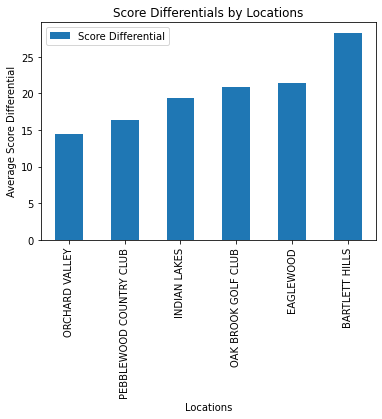

In [14]:
#data frame
data = pd.read_excel(path,index_col = "Holes")

frame = pd.DataFrame(data)
#print(frame)

#Average Score differential by locations
average_full = pd.DataFrame(data)
average_full = average_full[['Location','Score Differential']].loc[18].groupby(['Location']).mean().sort_values('Score Differential')

print(average_full)


average_full.plot(y='Score Differential', kind= 'bar', xlabel = 'Locations', ylabel = "Average Score Differential")
plt.title('Score Differentials by Locations')
plt.show()